Linear relationship between dependent and independent variable.

No Multicolinearity

Normality of Residual

Homoscedasticity

No Autocorelation of Error 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/sample_data/linear_assumption.csv')

In [3]:
df.head()

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647


In [4]:
x = df.drop(columns='target',axis=1)
y= df['target']

In [5]:
x.head()

,feature1,feature2,feature3
0,-0.570563,1.420342,0.495580
1,-0.990563,0.556965,1.045064
2,-0.674728,0.150617,1.774645
3,0.388250,-0.387127,-0.110229
4,1.167882,-0.024104,0.145063


In [6]:
y.head()

0    -9.763182
1   -24.029355
2    45.616421
3    34.135737
4    86.663647
Name: target, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [9]:
lr.fit(x_train,y_train)

LinearRegression()

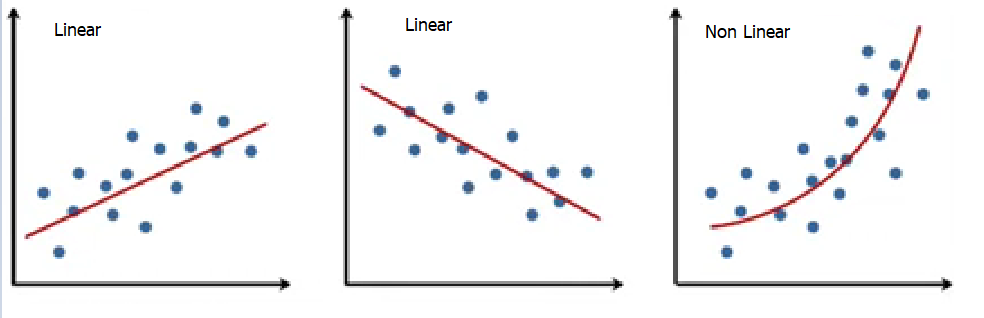

In [10]:
# Residual
y_pred = lr.predict(x_test)
residual = y_test - y_pred

# Linear Relationship

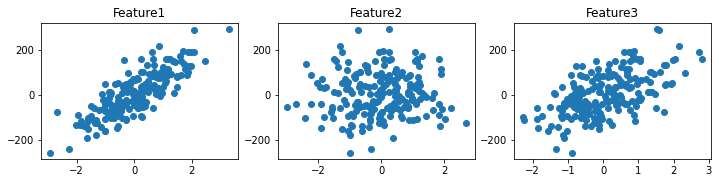

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (12,2.5))
ax1.scatter(df['feature1'], df['target'])
ax1.set_title('Feature1')
ax2.scatter(df['feature2'], df['target'])
ax2.set_title('Feature2')
ax3.scatter(df['feature3'], df['target'])
ax3.set_title('Feature3')

plt.show()

# Multicolinearity

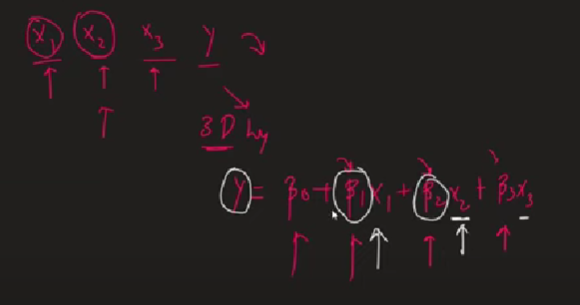

All the independent features must be independent of each other.
If by changing feature one other feature is also chaning then there is  multicolinearity. 

Here B1 represents that by changing value of how much change will occur in Y considering x2 and x3 are constant. Our job is to get B1, B2, and B3.
If indepndent variables are corelated then by changing value of x1 other corelated varaibles value will also get change,idealy they should be constant.

**Using VIF (variance_inflation_factor)**
if VIF is 5 or more than 5 then feature is with multicolinearity

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(x_train.shape[1]):
    vif.append(variance_inflation_factor(x_train.values, i))

In [33]:
pd.DataFrame({'vif': vif}, index=df.columns[0:3]).T

,feature1,feature2,feature3
vif,1.010326,1.009871,1.01395


In [93]:
# another code for same
vif_data = pd.DataFrame()
vif_data["feature"] = x_train.columns
vif_data["VIF"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

vif_data

,feature,VIF
0,feature1,1.010326
1,feature2,1.009871
2,feature3,1.013950


**Using corelation Heatmap**

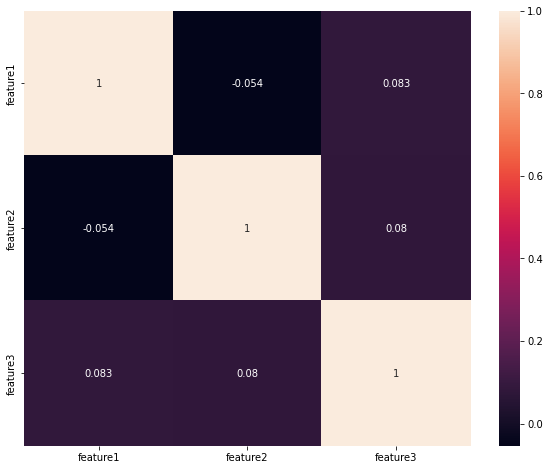

In [62]:
plt.figure(figsize = (10,8))
sns.heatmap(x_train.corr(),annot=True)

# Normality of Residual

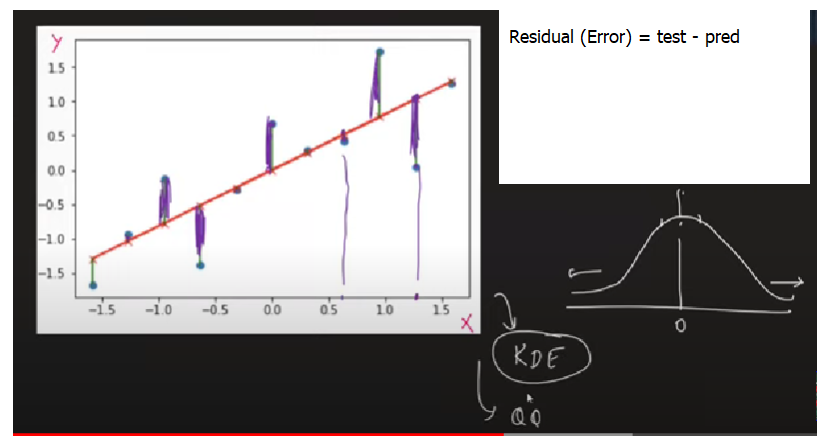

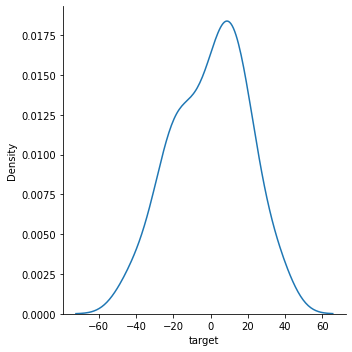

In [68]:
sns.displot(residual, kind = 'kde')

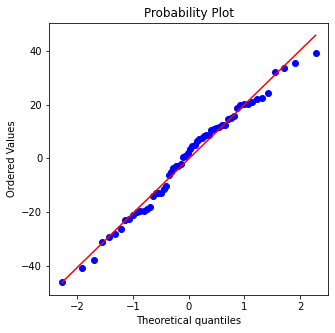

In [74]:
# QQ Plot
import scipy as sp
fig, ax = plt.subplots(figsize = (5,5))

sp.stats.probplot(residual,plot = ax, fit=True)
plt.show()

# Homoscedasticity

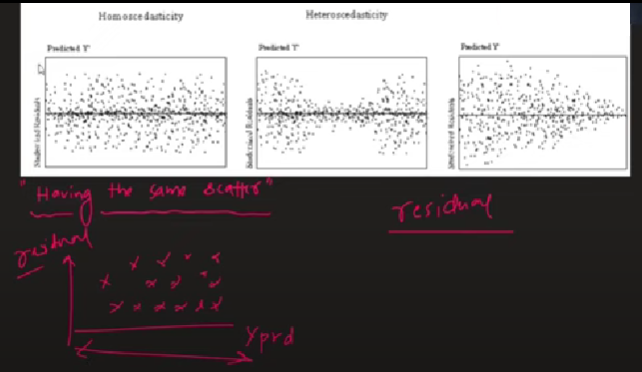

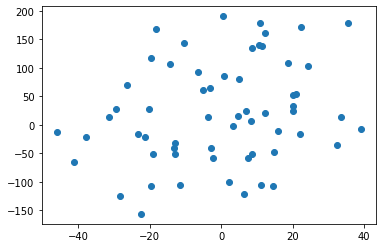

In [75]:
plt.scatter(residual,y_pred)

# No Autocorelation of Error

If we plot our all residual then there should be no pattern.

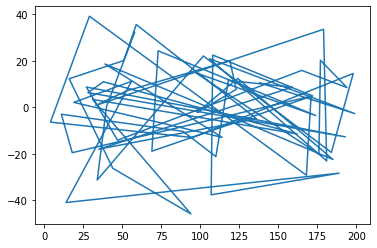

In [76]:
plt.plot(residual)